<span style="font-size: 50px;">CNN with PyTorch</san>

# Intro about Deep Learning

**<span style="color: red;">Question: </span> What is deep learning**

Deep learning is a subset of machine learning that uses <span style="color: red;">multilayered neural networks</span>, called deep neural networks, to simulate the complex decision-making power of the human brain.

 - subset of machine learning, can solve different problems
 - **Not** always a better method

**Neural networks**

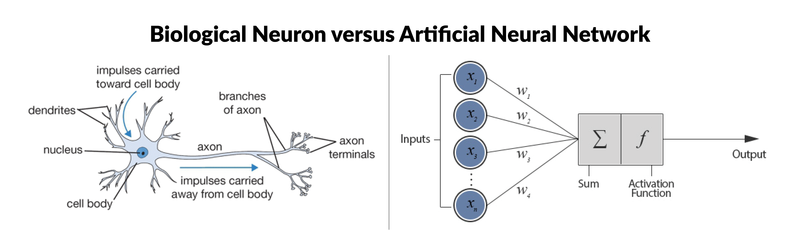


$ y = f(\sum_i{x_iw_i+w_0})$


**Multilayer Perceptron (MLP)**

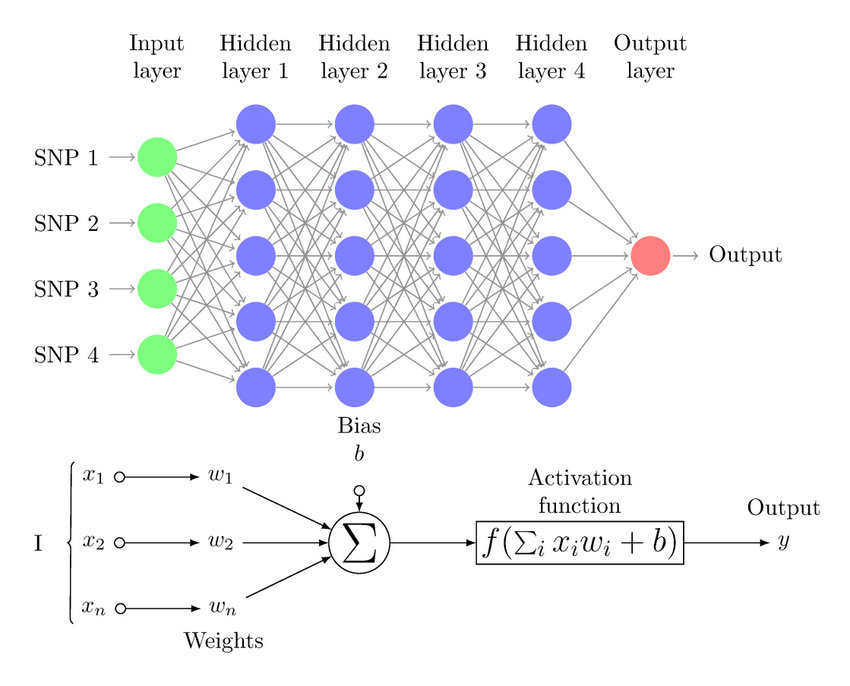

**<span style="color: red;">Question: </span> The function of activation function**

Activation functions play a crucial role in machine learning and deep learning. Here are some of the key functions of activation functions:

(Important)
- **Introducing Non-linearity**:Activation functions introduce non-linearity into the model, allowing neural networks to learn and model complex mappings.

- **Determining the Output Range of the Model**: Various activation functions have different output ranges, affecting the model's predictive capabilities.


## Common Activation Functions

- **Sigmoid Function**: Introduces an S-shaped curve that squashes the input values between 0 and 1.
  $$\sigma(x) = \frac{1}{1 + e^{-x}}$$

- **Tanh Function (Hyperbolic Tangent)**: Provides an output range of -1 to 1.
  $$\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$$

- **ReLU Function (Rectified Linear Unit)**: Allows only positive input values to pass through.
  $$\text{ReLU}(x) = \max(0, x)$$

- **Leaky ReLU**: A variation of ReLU that allows a small, negative gradient when the input is less than zero.
  $$\text{Leaky ReLU}(x) = \max(\alpha x, x)$$
  Where $\alpha$ is a small positive number.

- **Softmax Function**: Often used in the output layer of a neural network for multi-class classification problems to output a probability distribution.

The choice of activation function typically depends on the specific application and the architecture of the neural network.

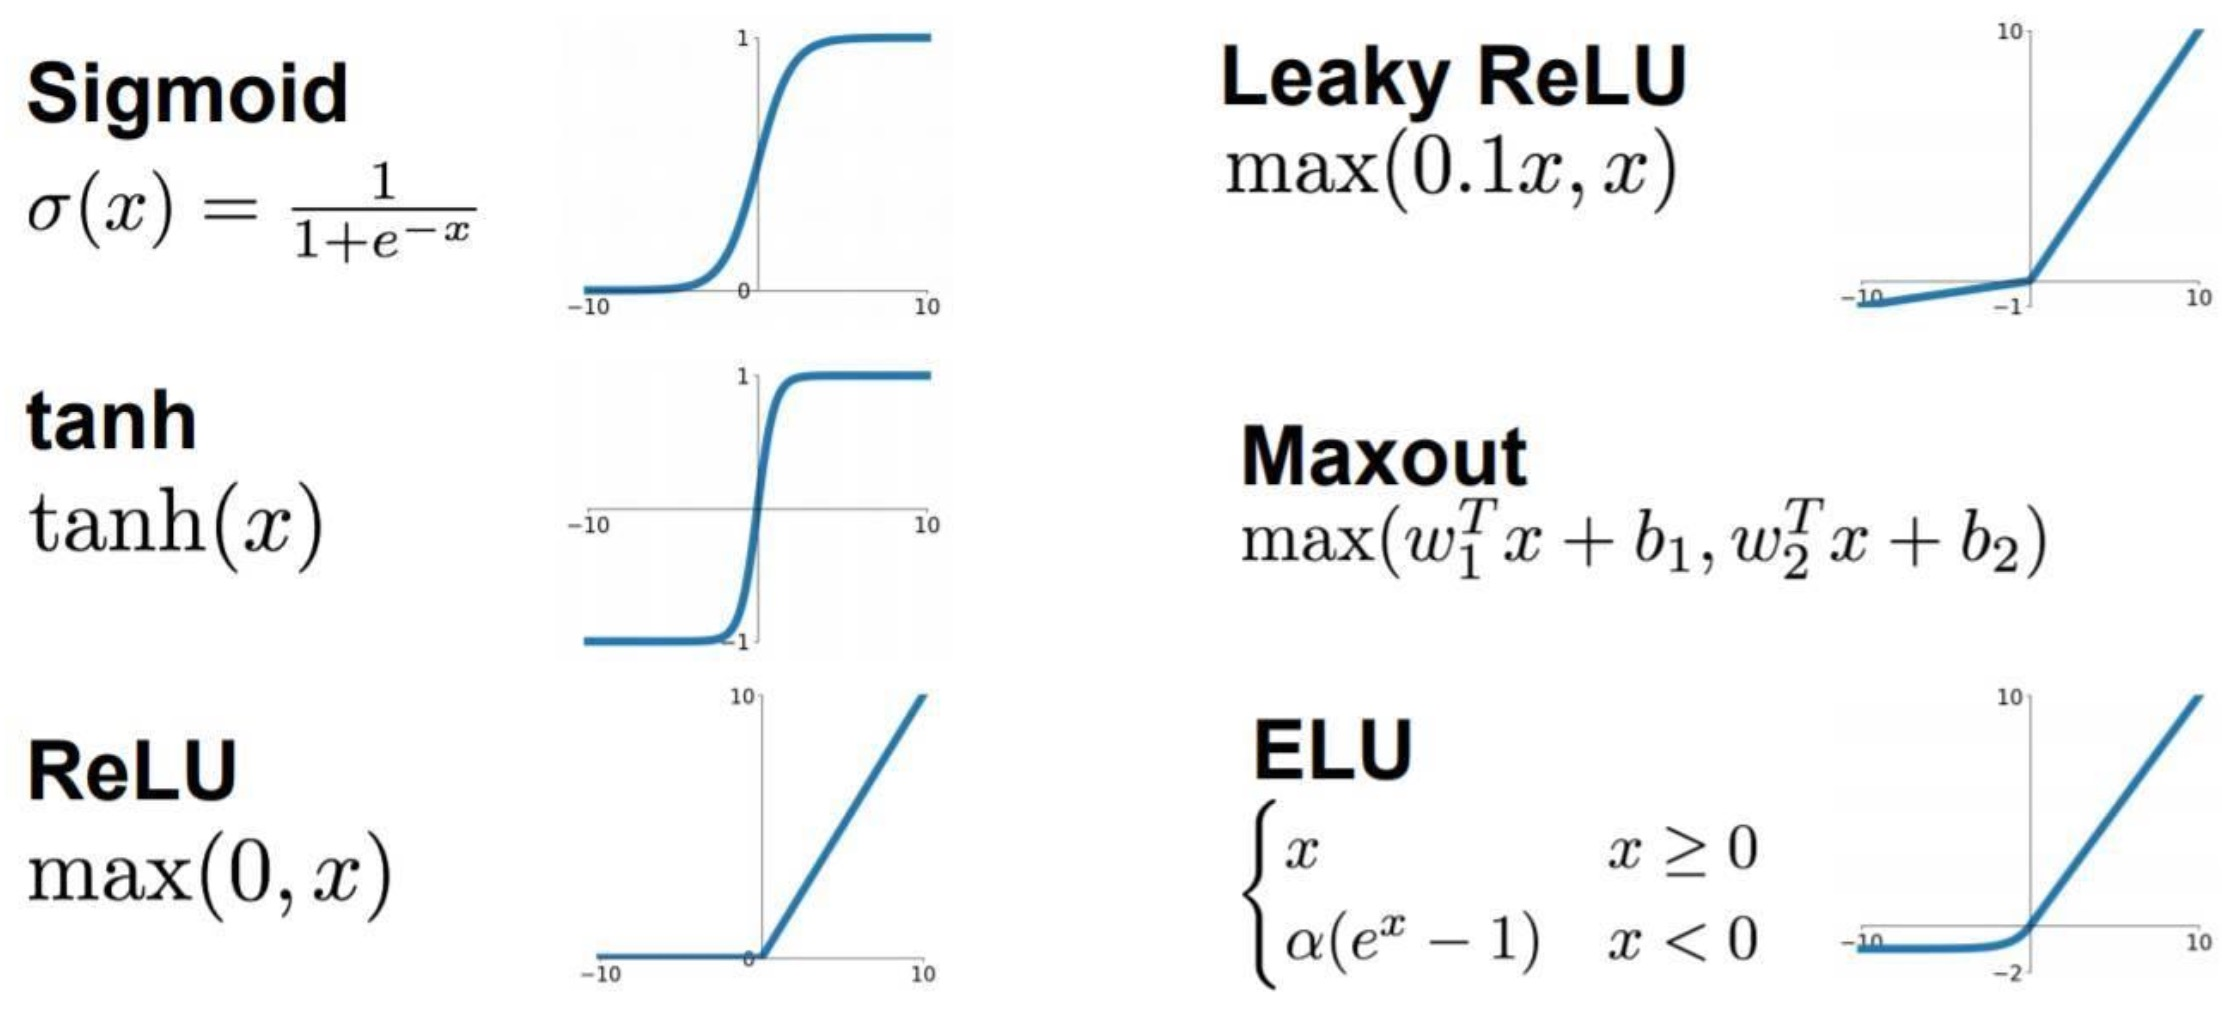

# Intro of CNN

Based on **Receptive Field**. 

- **Parameter Sharing**: Reduces computational cost and memory usage.
- **Spatial Hierarchy**: Learns complex patterns from simple features.
- **Translation Invariance**: Detects objects regardless of their position.

Main features: 
- Convolution layers.
- Pooling layers

![Sample Lenet](images/lenet.png)


## Convolution layers: Eyes

**<span style="color: red;">Question: </span> The function of convolution layers**

**Key words:** Feature extractions

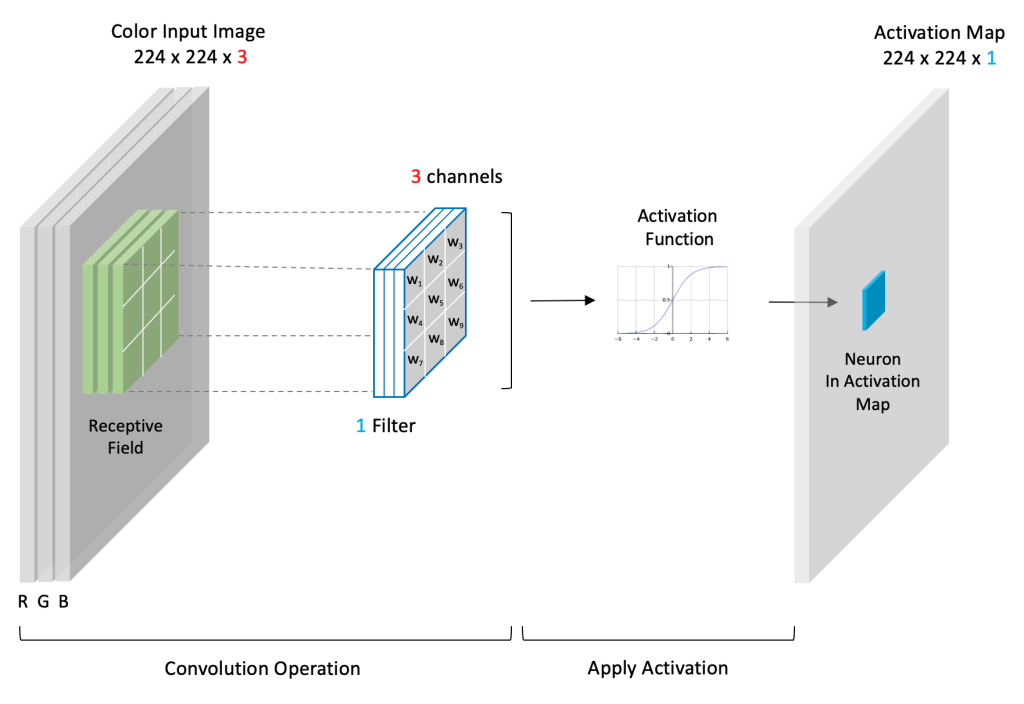


**The Convolution Operation (Input * Kernel)**

**<span style="color: red;">Question: </span> what is the kernel and activation layer in CNN**


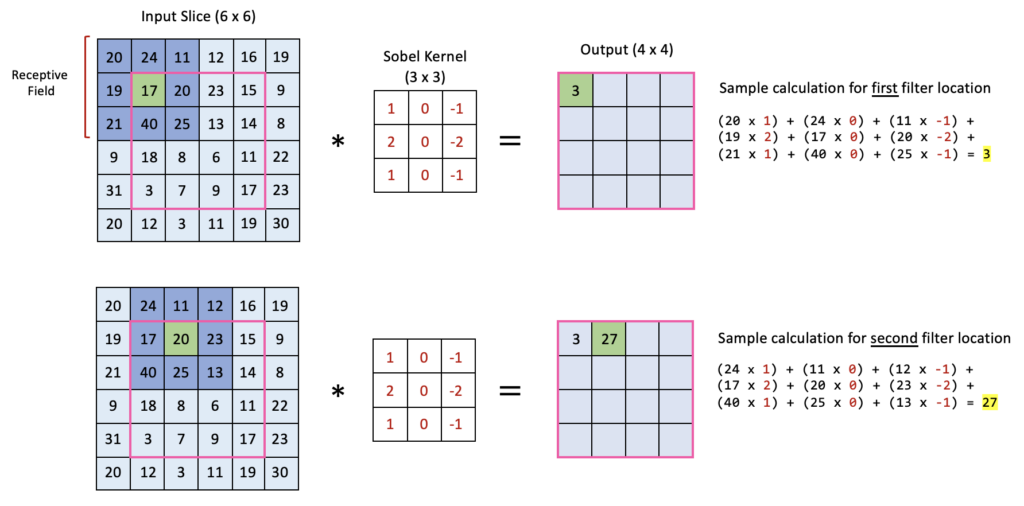

gif: https://learnopencv.com/understanding-convolutional-neural-networks-cnn/

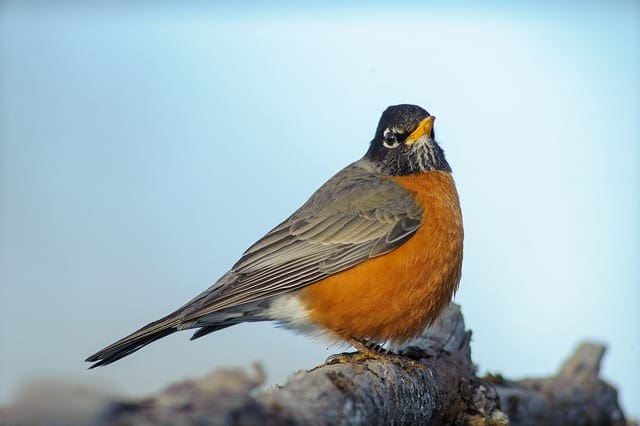

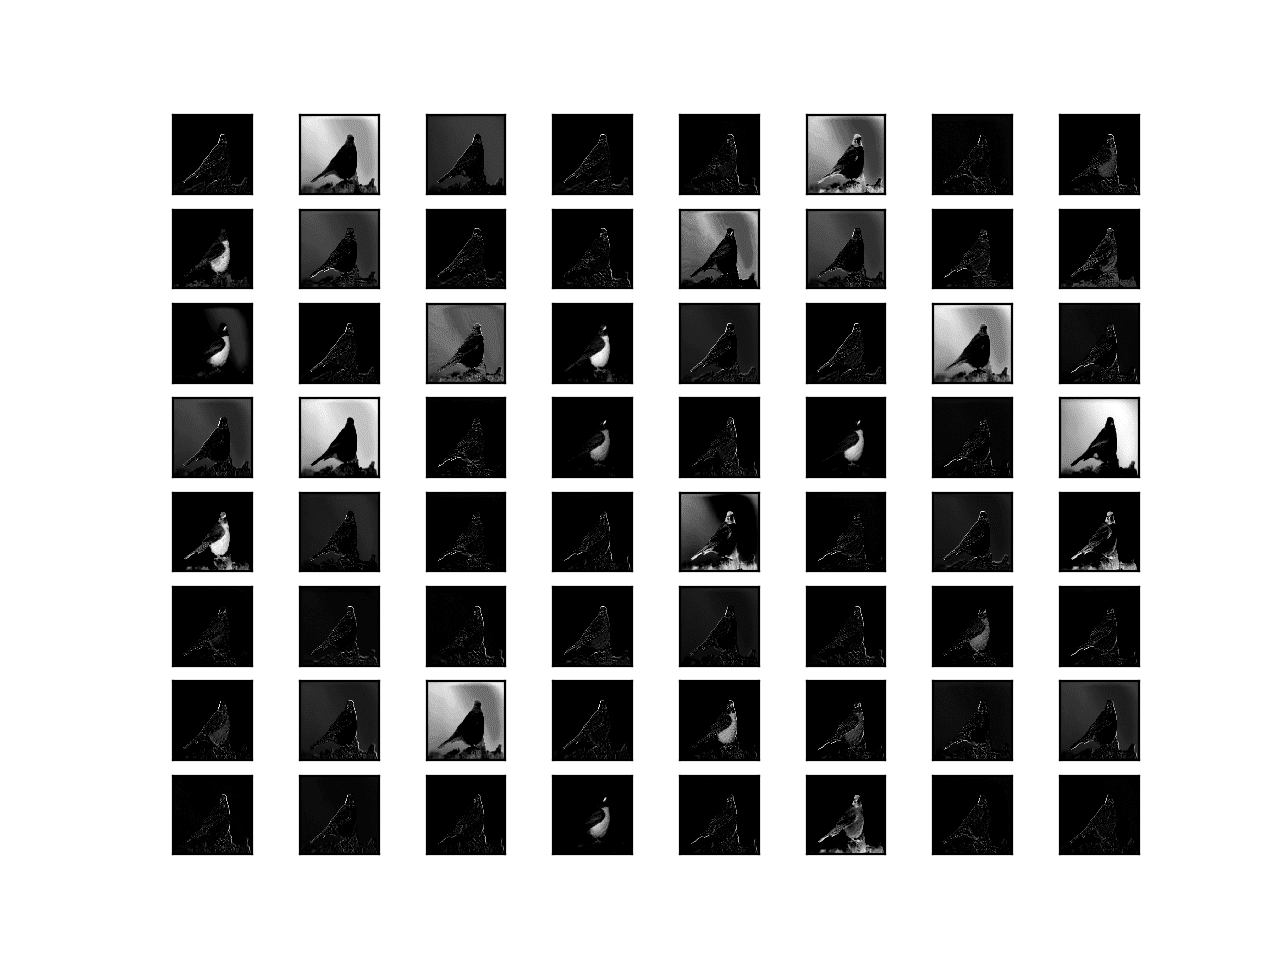

## Pooling layers: Feature Reductions

**<span style="color: red;">Question: </span> The function of pooling layers**

- **Dimenstion Reduction**
- **Freature Extration**
- **"invariance to transformation**

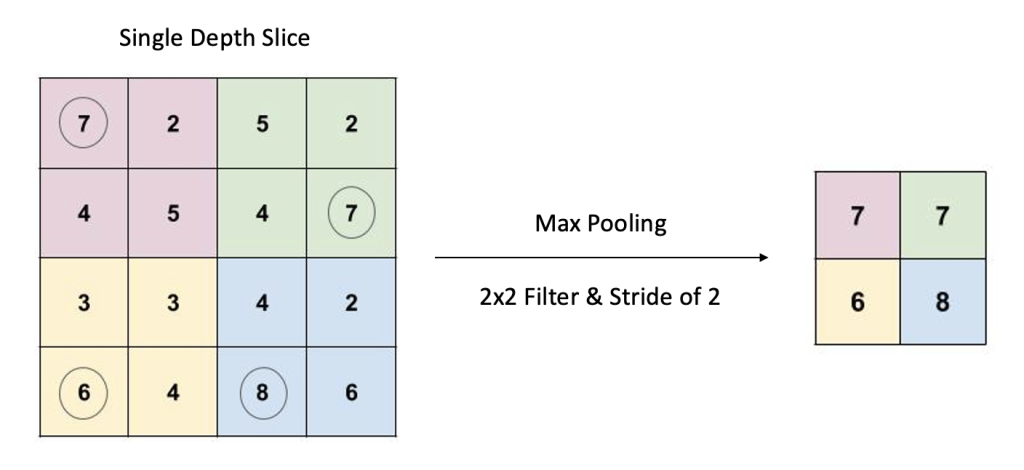

<span style="font-size: 20px;">Dataset：</span> Chinese MNIST(https://www.kaggle.com/datasets/gpreda/chinese-mnist)

**Data store at "./data/"**


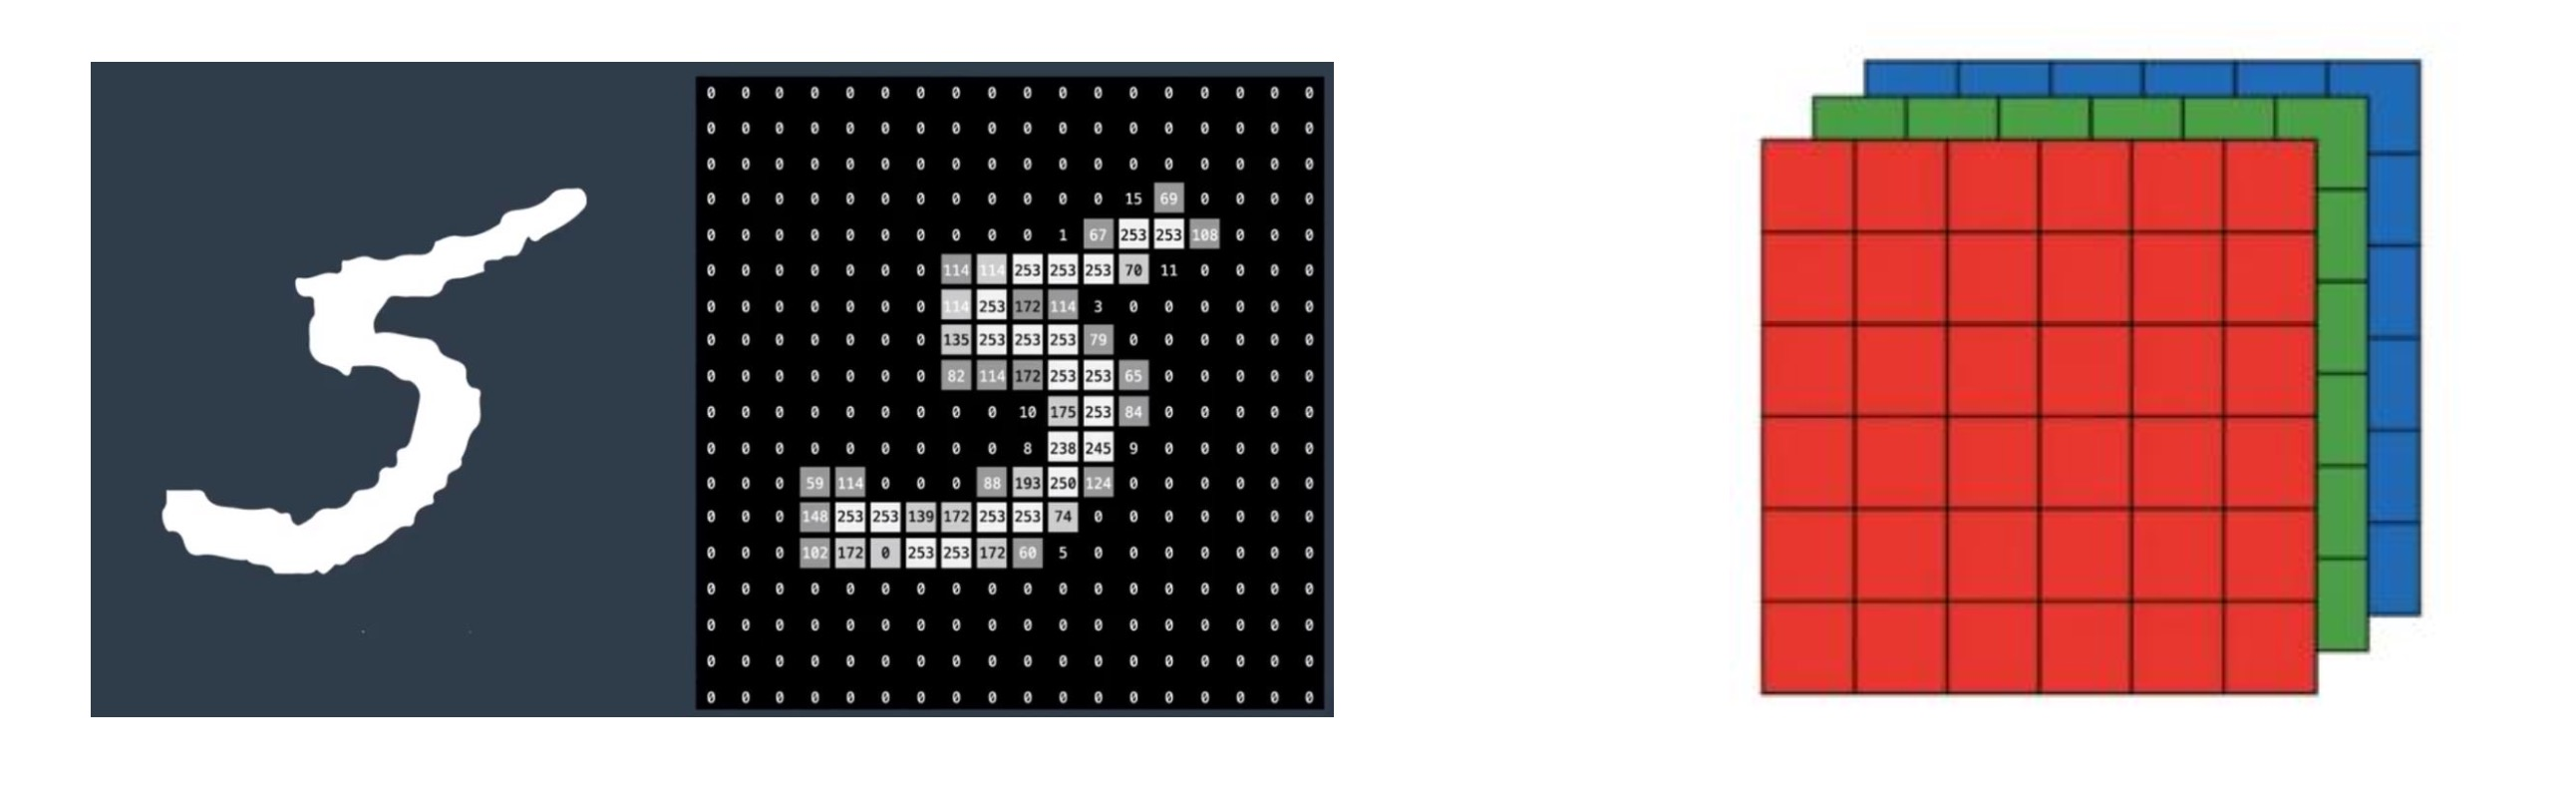

# 1. EDA

In [1]:
import os
import gc
import numpy as np
import pandas as pd
import random as rd
import matplotlib as mpl
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from glob import glob
from PIL import Image as pil_image
%matplotlib inline

In [2]:
# Helper Function：display pictures 24 per row
def show_pics(imgs, codes, per_row=2):
    n    = len(imgs)
    rows = (n + per_row - 1)//per_row
    cols = min(per_row, n)
    fig, axes = plt.subplots(rows,cols, figsize=(24//per_row*cols,24//per_row*rows))
    for ax in axes.flatten(): ax.axis('off')
    for i,(img,ax) in enumerate(zip(imgs, axes.flatten())): 
        ax.imshow(img.convert('RGB'))
        ax.set_title(codes[i])
        

In [3]:
# Get file paths for all pictures
data_list = glob('./data/*')
#print(data_list)

# Randomly display 100 picture
example = [rd.randint(0, len(data_list)-1) for _ in range(100)]
imgs = [pil_image.open(data_list[i]) for i in example]


Check the file name，it has a pattern of “input_<batch #>_<batch #>_<label>”，so we directly parse the file name too ge the label

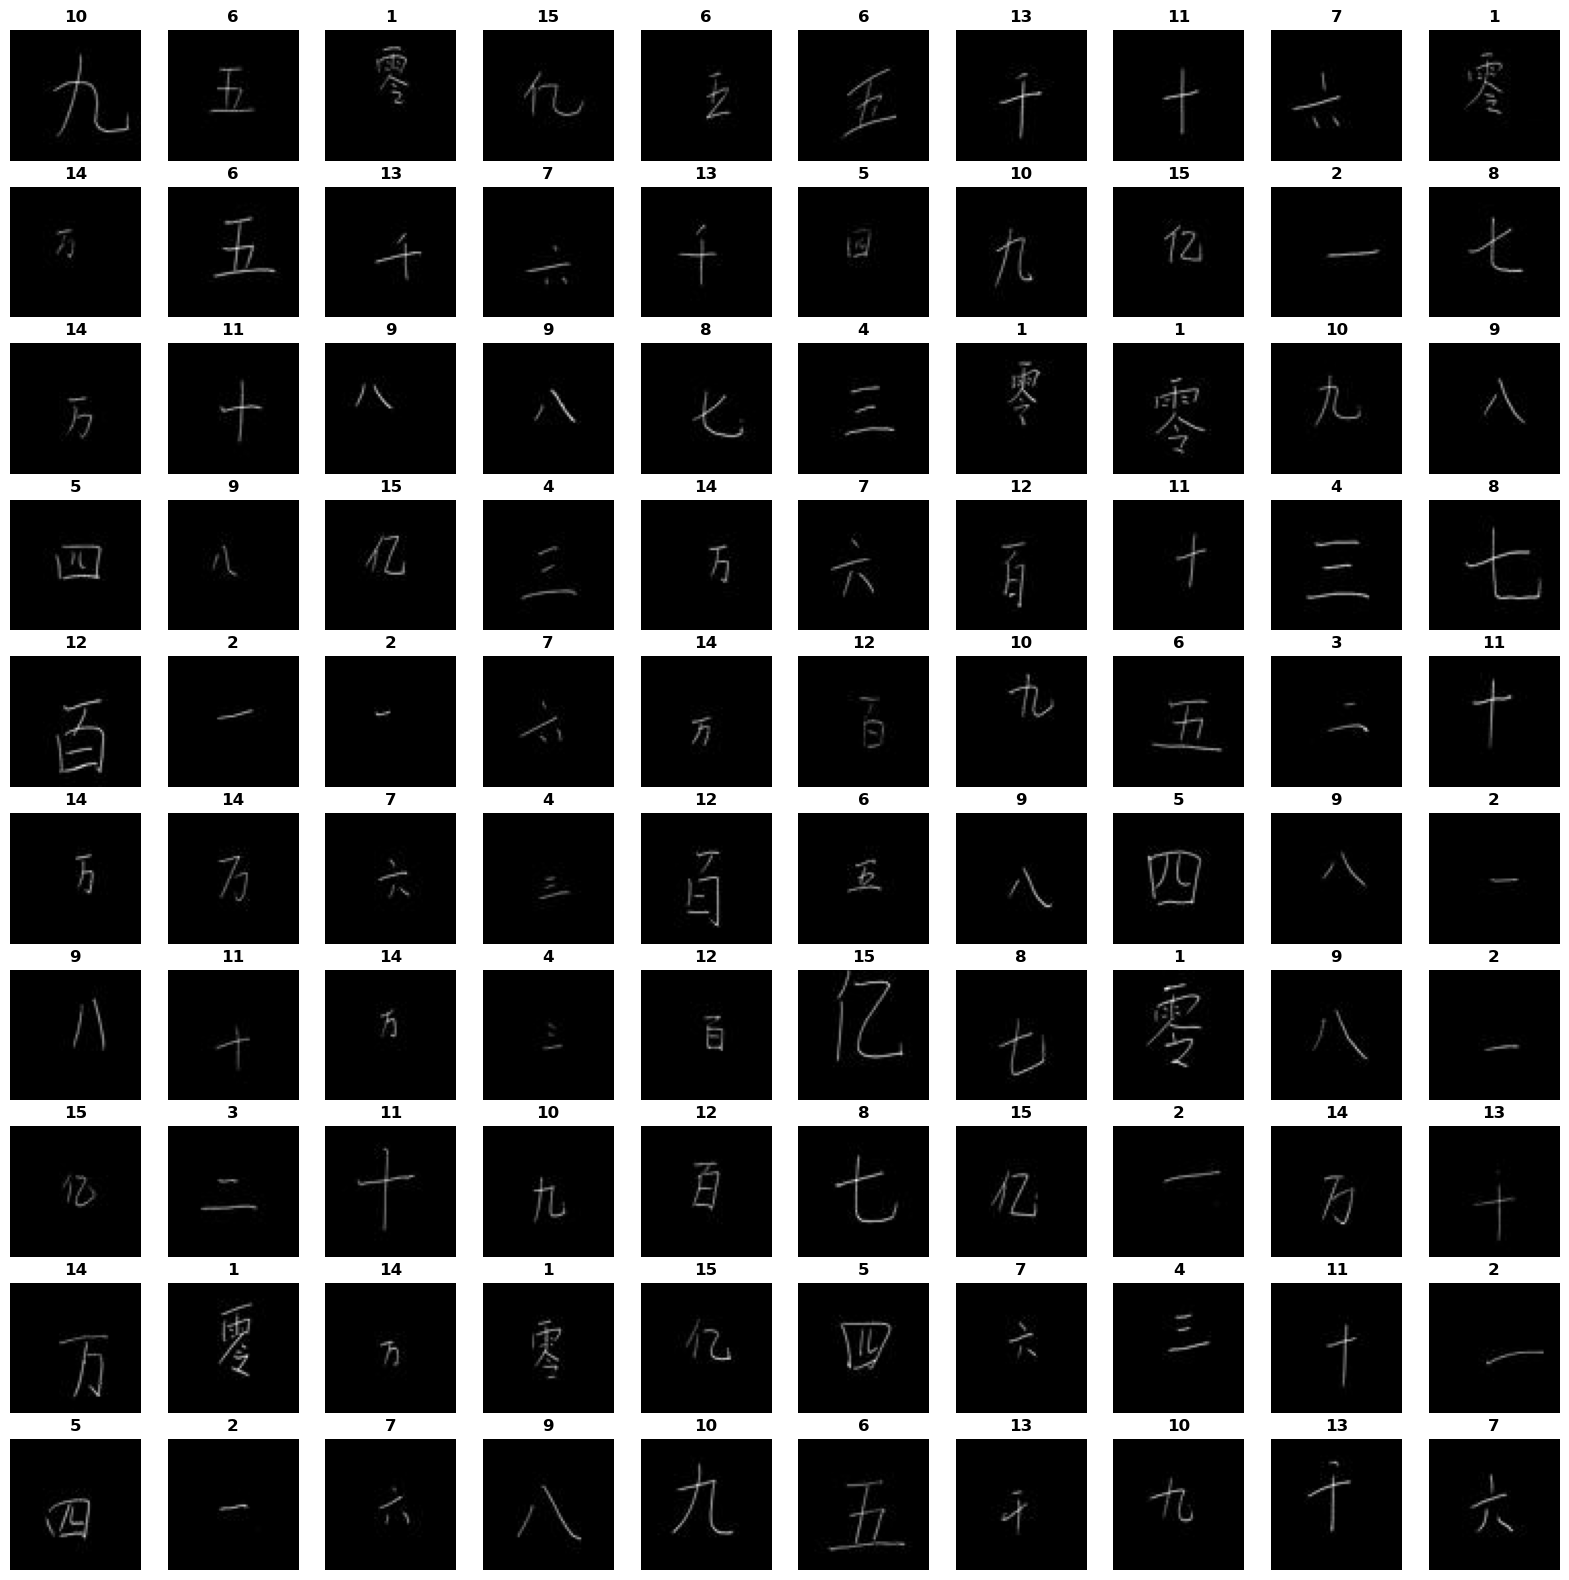

In [4]:
def get_code(i):
    m = data_list[i].split('_')[3]
    m = m.split('.')[0]
    return str(int(m))
codes = [get_code(i) for i in example]

show_pics(imgs, codes, per_row=10)

check chinest_mnist.csv for more info about this dataset

In [5]:
import pandas as pd

In [6]:
info = pd.read_csv('chinese_mnist.csv')
code_char = info[['code','character']]
code_char = code_char.drop_duplicates(subset=['code','character']).set_index('code')
code_dict = code_char.to_dict()['character']
code_dict

{10: '九',
 11: '十',
 12: '百',
 13: '千',
 14: '万',
 15: '亿',
 1: '零',
 2: '一',
 3: '二',
 4: '三',
 5: '四',
 6: '五',
 7: '六',
 8: '七',
 9: '八'}

# 2. Load Data to Data Loader

In [7]:
print(data_list[0])
print('Total num of pictures： ',len(data_list))

./data\input_100_10_1.jpg
Total num of pictures：  15000


## Check one picture
First check the size and how many channels we have for each picture，“L” means Luminance, aka the picture only has one grey scale channel

In [8]:
sample = pil_image.open(data_list[0])
print('Size of pic:',sample.size)
print('Picture Mode:',sample.mode)

Size of pic: (64, 64)
Picture Mode: L


If needed, we can resize the image or even convert it to a grayscale image.

This process can be easily accomplished using the PIL library:
```python
# For example, we can resize the image to a 32x32 image
SIZE = (32, 32)
sample.resize(SIZE)
# For example, we can convert the image to a grayscale image
sample.convert('L')

## Load the Image

Here we need to perform two processes:
1. Convert the image into a matrix, which we can achieve using numpy.
2. Prepare the labels. Since this dataset has already been numbered, but it uses 1-15 for numbering, we will transform it to 0-14.


In [9]:
X=[]
y=[]


In [10]:
print('Loading the training set:')
for path in tqdm(data_list):
    img = pil_image.open(path)
    
    # get the label from the file name
    name = path.split('_')[3]
    label = int(name.split('.')[0]) - 1
    
    feature = np.array(img)
    
    # This is certainly an unnecessary step, but let's give it a try, because in real image data, there is often a line for the channel.
    expended_feature = np.expand_dims(feature, axis=-1)
    
    # append the label
    X.append(expended_feature) 
    y.append(int(label))
    
X = np.array(X)
y= np.array(y)



Loading the training set:


  0%|          | 0/15000 [00:00<?, ?it/s]

In [11]:
X.shape,np.array(X).min(),np.array(X).max()

((15000, 64, 64, 1), 0, 255)

In [12]:
len(y)

15000

## Splitting the Dataset

We will divide the dataset into Train, Valid, and Test sets with the proportions of 72%, 18%, and 10% respectively.

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=2024,stratify=y)

In [15]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=2024,stratify=y_train)

## Is Data Augmentation Needed?

Data augmentation is a technique used to increase the diversity of the data by applying various transformations to the images, such as rotation, scaling, flipping, etc. It can be beneficial to improve the robustness and generalization of the model. Whether to use data augmentation depends on the specific requirements and constraints of your project.

------- 
Highest count: 720 (class 0)
Lowest count: 720 (class 0)
------- 


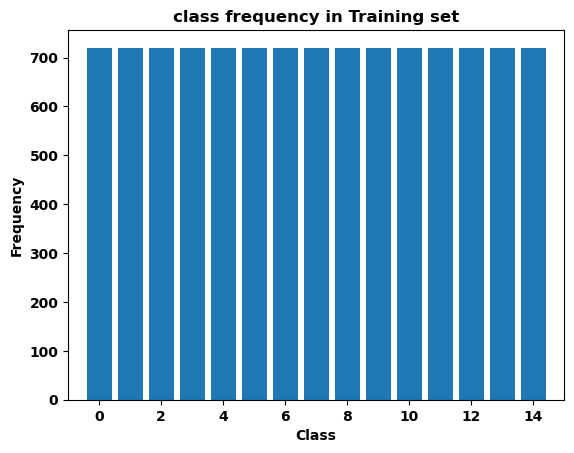

In [16]:
n_class = len(code_dict)
def get_count_imgs_per_class(y, verbose=False):
    y = np.array(y)
    num_classes = len(np.unique(y))
    count_imgs_per_class = np.zeros(num_classes)

    for this_class in range(num_classes):
        if verbose: 
            print('class {} | count {}'.format(this_class, np.sum(y==this_class)))
        count_imgs_per_class[this_class] = np.sum(y==this_class)
    return count_imgs_per_class

class_freq = get_count_imgs_per_class(y_train)
print('------- ')
print('Highest count: {} (class {})'.format(int(np.max(class_freq)), np.argmax(class_freq)))
print('Lowest count: {} (class {})'.format(int(np.min(class_freq)), np.argmin(class_freq)))
print('------- ')
plt.bar(np.arange(n_class), class_freq , align='center')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xlim([-1, n_class])
plt.title("class frequency in Training set")
plt.show()

## Data Augmentation is Clearly Not Needed

Despite the fact that we do not require any data augmentation, let's take a look at common image data augmentation techniques, such as affine transformations.

For instance, we can apply the following transformations to classes with fewer samples:
- Rotation
- Horizontal and vertical translation
- Scaling

Usually, we also impose certain constraints on these transformations, such as:
- Limiting the rotation angle to between `[-10, 10]` degrees, as excessive rotation may change the meaning of some images
- Limiting horizontal and vertical translations to within `[-3, 3]` pixels
- Limiting scaling transformations to between `[0.8, 1.2]`

This step can be accomplished by calling the `transf` function from the `skiimage` library.

```python
from skimage import transform as transf

# 3. Building a CNN Model with PyTorch (Key Point)

install PyTorch: https://pytorch.org/get-started/locally/

**Check PyTorch website if you want to use GPU! Latest version may not work well**

## data normalization

**<span style="color: red;">Question: </span> data normalization in deep learning**

Data normalization is a critical step in the training of deep learning models for several reasons:

- **Accelerate Convergence**
  - Deep learning models, particularly those using gradient descent, require many iterations to update weights.
  - Large scale differences in input data can slow down learning by causing inconsistent gradient updates across dimensions.
  - Rescaling data ensures more balanced gradients, speeding up convergence.

- **Prevent Vanishing or Exploding Gradients**
  - Wide value ranges in input data can lead to cumulative effects of gradients during backpropagation.
  - This can result in vanishing or exploding gradients, which rescaling helps to mitigate.

- **Improve Numerical Stability**
  - Extensive matrix operations and activation functions in deep learning models can be unstable with large numerical ranges in input data.
  - Rescaled data reduces the risk of underflow or overflow in floating-point calculations.

- **Enhance Model Generalization**
  - Normalized data helps models learn more generalized feature representations, avoiding sensitivity to inputs of specific scales.

- **Activation Function Sensitivity**
  - Some activation functions, like Sigmoid or Tanh, are sensitive to the scale of input values.
  - Oversaturation can impede gradient propagation; rescaling ensures the activation functions' outputs remain within an appropriate range.

- **Optimization Algorithm Assumptions**
  - Certain optimization algorithms, such as Adam, have specific assumptions about the distribution of input data.
  - Rescaled data better meets these assumptions, improving the optimization process and outcomes.


In [17]:
import torch

In [18]:
def scaler(dataset):
    dataset = np.array(dataset)
    n_imgs,img_height,img_width,img_depth = dataset.shape
    processed_dataset = np.zeros((n_imgs,img_height,img_width,1))
    for i in range(len(dataset)):
        img = dataset[i]
        processed_dataset[i,:,:,:] = img/255
    return processed_dataset

## DataSet (Key Point)

When using PyTorch, we typically write a custom dataset class to load the entire dataset. The implementation of this class can be quite flexible, allowing you to include all data preprocessing steps within it. Here, we'll include the scaler for normalization.

In [19]:
from torch.utils.data import Dataset, DataLoader

class CMNISTDataset(Dataset):
    def __init__(self, features, labels):
        
        # In Python, super().__init__() calls the initializer of the parent (super) class.
        # When you create a subclass and override its constructor, using super().__init__() is a good programming practice to ensure the parent class is properly initialized.
        
        super().__init__()
        
        # Normalize the data upon loading
        self.features = scaler(features)
        self.labels = labels
        return
    def __getitem__(self, index):
        feature = self.features[index]
        target = self.labels[index]

        # Return a tuple containing the feature tensor and the target tensor
        return torch.tensor(feature).float().permute([2, 1, 0]), torch.tensor(target).long()
    def __len__(self):
        # Return the number of items in the dataset
        return self.features.shape[0]

In [20]:
# Define the batch size for processing each time; theoretically, the larger the better, but it depends on the size of your GPU memory.
BATCH_SIZE = 512

In [21]:
train_loader = DataLoader(CMNISTDataset(X_train, y_train), batch_size=BATCH_SIZE, shuffle=True, num_workers=0)
valid_loader = DataLoader(CMNISTDataset(X_val, y_val), batch_size=BATCH_SIZE, shuffle=True, num_workers=0)
test_loader  = DataLoader(CMNISTDataset(X_test,y_test), batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

Here you can check if the data has been properly loaded.

In [22]:
for x, y in train_loader:
    break

Here, the dimension is (batch_size, height, width, number of channels).

In [23]:
x.shape

torch.Size([512, 1, 64, 64])

In [24]:
y

tensor([10,  9, 13, 10,  8,  6,  4,  4, 13,  5,  3, 11,  0,  6,  5,  3,  7,  2,
         3,  4,  8,  6,  9,  1,  8, 13, 10,  3,  9,  0, 12,  8,  4,  5, 10,  2,
         4, 12,  4,  2,  8,  7, 13, 13,  0,  2, 13,  5,  3,  8,  9, 10, 10, 14,
         5, 13, 12,  2,  7,  6,  8,  6,  5,  2, 14, 13,  9, 10, 12,  7, 10, 12,
        11,  7,  9,  0,  0,  7,  6,  7,  6,  2,  2,  5,  1,  0,  6, 11,  3,  7,
         9,  2,  9,  5,  4, 11,  8,  3,  8, 10,  9, 12,  4,  1, 10, 13,  0,  7,
         0, 14,  6,  1,  6,  0,  1, 14,  8,  3, 14,  6,  8, 14, 11, 12,  4,  0,
        14, 10, 14,  6, 11,  4,  6, 13,  5,  5,  2, 12,  4, 14,  2,  5,  9,  4,
        12,  8, 14,  8,  2,  8,  2,  8,  4, 10,  2, 14,  9,  0, 12,  8,  4, 11,
        14, 12,  1, 10,  4,  5, 11,  8,  8,  4, 13,  2, 12,  6, 11,  5,  7,  7,
         3,  9,  5,  7,  7,  8,  0,  2, 10,  2, 11,  0, 12,  4,  4,  0,  1, 12,
         9, 14,  7,  7, 10,  3,  8,  6,  5,  7,  9, 14,  5,  3,  9, 13, 13,  3,
        12,  9, 14, 10,  7,  9,  6,  0, 

In [25]:
len(y)

512

## CNN Model Architecture

We will make some modifications to the classic LeNet5 network here.

![Sample Lenet](images/lenet.png)

The reference structure is as follows:

01. 5x5 convolution (64x64x1 in, 64x64x6 out)
02. ReLU
03. 2x2 max pool (64x64x6 in, 32x32x6 out)
04. 5x5 convolution (32x32x6 in, 28x28x16 out)
05. ReLU
06. 2x2 max pool (28x28x16 in, 14x14x16 out)
07. 5x5 convolution (14x14x16 in, 10x10x32 out)
08. ReLU
09. 2x2 max pool (10x10x32 in, 5x5x32 out)
10. 5x5 convolution (5x5x32 in, 1x1x800 out)
11. ReLU
12. Flatten layers from numbers 11 (1x1x400 -> 800) and 9 (5x5x16 -> 800)
13. Concatenate flattened layers to a single size-800 layer
14. Dropout layer
15. Fully connected layer (1600 in, 15 out)

>**Note: The functional API must be used to construct the CNN [Reference Link](https://keras.io/models/model/)**

In [26]:
from torch import nn, optim
from torch.nn import functional as F

In [27]:
# We have previously counted the total number of classes we have.
n_class

15

In [28]:
class Net(nn.Module):
    def __init__(self, num_classes):

        # init the model
        super().__init__()
        self.num_classes = num_classes

        # add all layers
        self.conv0 = nn.Conv2d(in_channels= 1, out_channels= 6, kernel_size = 5, padding =2)
        self.maxpool0 = nn.MaxPool2d(2)

        self.conv1 = nn.Conv2d(in_channels= 6, out_channels= 16, kernel_size = 5)
        self.maxpool1 = nn.MaxPool2d(2)
        
        self.conv2 = nn.Conv2d(in_channels= 16, out_channels= 32, kernel_size = 5)
        self.maxpool2 = nn.MaxPool2d(2)
        
        self.conv3 = nn.Conv2d(in_channels= 32, out_channels= 800, kernel_size = 5)

        self.dropout = nn.Dropout(0.2)
        self.fc = nn.Linear(in_features=1600, out_features=num_classes)


    def forward(self, x):
        # layer 1
        x = self.maxpool0(torch.relu(self.conv0(x)))
       
        # layer 2
        x1 = self.maxpool1(torch.relu(self.conv1(x)))
       
        # layer 3
        x2 = self.maxpool2(torch.relu(self.conv2(x1)))

        # layer 4
        x3 = torch.relu(self.conv3(x2))
        
        # flatten layer
        x4 = torch.flatten(x2,start_dim=1)

        x5 = torch.flatten(x3,start_dim=1)

        # concat
        x = torch.concat([x4, x5],dim=1)

        # dropout and fully concat
        x = self.fc(self.dropout(x))

        
        return x

**<span style="color: red;">Question: </span> why use drop-out layers**

Prevent Overfitting


## Build Our Model

In [29]:
model = Net(num_classes=n_class)

# 4. Train Models

## Allocate Directory to store the model

In [30]:
if not os.path.exists('models'):
    os.makedirs('models') 

Device

In [31]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#device = 'cpu'
print(device)

cuda


Place the model on the device.

(Optional) how to install CUDA: https://docs.nvidia.com/cuda/cuda-installation-guide-microsoft-windows/index.html

In [32]:
model = model.to(device)

**<span style="color: red;">Question: </span> What are GPU and TPU? Why we use GPU or TPU to train deep learning models?**


## Criterion

In [33]:
criterion = nn.CrossEntropyLoss()

**<span style="color: red;">Question: </span> Common loss function and use cases**

- **Cross-Entropy Loss**: multi-class
- **Binary Cross-Entropy (BCE) Loss**: binary classification
- **Focal Loss**: imbalanced data

## Optimizer

Optimizers adjust model parameters iteratively during training to minimize a loss function, enabling neural networks to learn from data

In [34]:
lr = 0.001
optimizer = optim.Adam(model.parameters(), lr=lr)

**<span style="color: red;">Question: </span> What is backpropagation**

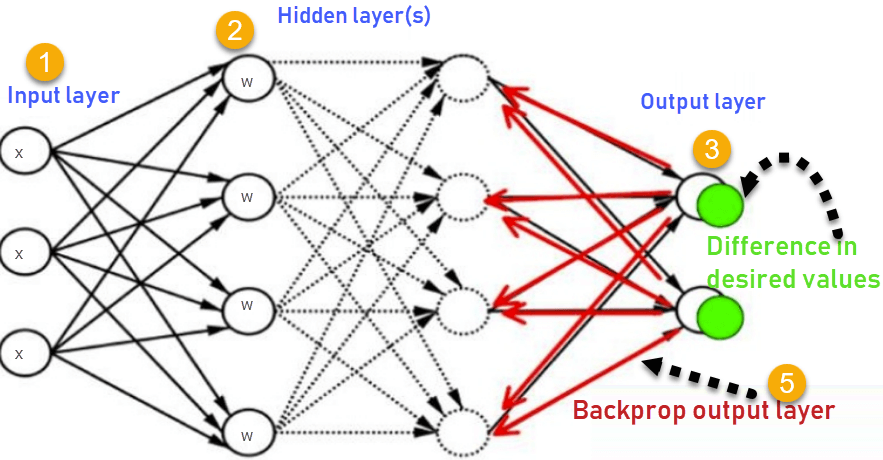

## Train function

In [35]:
def train_model(epoch, history=None):
    model.train() 
    t = tqdm(train_loader)
    
    for batch_idx, (img_batch, label_batch) in enumerate(t):
        img_batch = img_batch.to(device)
        label_batch = label_batch.to(device)
        
        optimizer.zero_grad()
        output = model(img_batch)
        loss = criterion(output, label_batch)
        t.set_description(f'train_loss (l={loss:.4f})')
        
        if history is not None:
            history.loc[epoch + batch_idx / len(train_loader), 'train_loss'] = loss.data.cpu().numpy()
        
        loss.backward()    
        optimizer.step()
    
    torch.save(model.state_dict(), 'models/epoch{}.pth'.format(epoch))

In [36]:
from sklearn.metrics import accuracy_score

def evaluate(epoch, history=None):
    model.eval() 
    valid_loss = 0.
    all_predictions, all_targets = [], []
    
    with torch.no_grad():
        for batch_idx, (img_batch, label_batch) in enumerate(valid_loader):
            all_targets.append(label_batch.numpy().copy())
            img_batch = img_batch.to(device)
            label_batch = label_batch.to(device)

            output = model(img_batch)
            loss = criterion(output, label_batch)
            valid_loss += loss.data
            predictions = torch.argmax(torch.softmax(output, axis=-1), axis=-1)
            all_predictions.append(predictions.cpu().numpy())
            
    all_predictions = np.concatenate(all_predictions)
    all_targets = np.concatenate(all_targets)
    
    valid_loss /= (batch_idx+1)
    valid_acc = accuracy_score(all_targets, all_predictions)
    
    if history is not None:
        history.loc[epoch, 'valid_loss'] = valid_loss.cpu().numpy()
    
    print('Epoch: {}\tLR: {:.6f}\tValid Loss: {:.4f}\tValid Acc: {:.4f}'.format(
        epoch, optimizer.state_dict()['param_groups'][0]['lr'], valid_loss, valid_acc))
    
    return valid_loss, valid_acc

# Learning Rate Decay

**<span style="color: red;">Question: </span>Why we use Learning Rate Decay and early stop**

Learning rate decay is a technique used in training neural networks to gradually reduce the learning rate during training. This is important for several reasons:

1. **Convergence**: It helps the training process to converge more effectively by allowing the model to take smaller steps as it approaches an optimal solution.
2. **Avoiding Local Minima**: By reducing the learning rate, we can avoid the issue of getting stuck in local minima, as the model can continue to explore the loss landscape even with a smaller step size.
3. **Fine-Tuning**: As the learning rate decreases, the model can fine-tune its weights with more precision, which can lead to better performance on the validation set.
4. **Regularization Effect**: A slowly decreasing learning rate can have a regularizing effect, similar to techniques like L2 regularization, by penalizing large weight updates.
5. **Adaptation**: It allows the learning rate to adapt to the training dynamics, potentially improving the efficiency and effectiveness of the optimization process.

Implementing learning rate decay can be done through various schedules, such as step decay, exponential decay, or using more sophisticated methods like cyclical learning rates or learning rate warm-up.

In [37]:
history_train = pd.DataFrame()
history_valid = pd.DataFrame()

n_epochs = 100
init_epoch = 0
max_lr_changes = 2
valid_losses = []
valid_accs = []
lrs = []
lr_reset_epoch = init_epoch
patience = 3
lr_changes = 0
best_valid_loss = 1000.

for epoch in range(init_epoch, n_epochs):
    torch.cuda.empty_cache()
    gc.collect()
    train_model(epoch, history_train)
    valid_loss, valid_acc = evaluate(epoch, history_valid)
    valid_losses.append(valid_loss)
    valid_accs.append(valid_acc)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
    elif (patience and epoch - lr_reset_epoch > patience and
          min(valid_losses[-patience:]) > best_valid_loss):
        # "patience" epochs without improvement
        lr_changes +=1
        if lr_changes > max_lr_changes: # Early stop mechnism
            break
        lr /= 5 # Learning Rate Decay

        print(f'lr updated to {lr}')
        lr_reset_epoch = epoch
        optimizer.param_groups[0]['lr'] = lr
    
    lrs.append(optimizer.param_groups[0]['lr'])

  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 0	LR: 0.001000	Valid Loss: 2.1369	Valid Acc: 0.3544


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 1	LR: 0.001000	Valid Loss: 1.6121	Valid Acc: 0.4774


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 2	LR: 0.001000	Valid Loss: 1.1612	Valid Acc: 0.6244


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 3	LR: 0.001000	Valid Loss: 0.8435	Valid Acc: 0.6996


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 4	LR: 0.001000	Valid Loss: 0.6293	Valid Acc: 0.7922


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 5	LR: 0.001000	Valid Loss: 0.5159	Valid Acc: 0.8307


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 6	LR: 0.001000	Valid Loss: 0.4495	Valid Acc: 0.8548


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 7	LR: 0.001000	Valid Loss: 0.4330	Valid Acc: 0.8474


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 8	LR: 0.001000	Valid Loss: 0.3365	Valid Acc: 0.8815


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 9	LR: 0.001000	Valid Loss: 0.2875	Valid Acc: 0.9078


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 10	LR: 0.001000	Valid Loss: 0.2632	Valid Acc: 0.9122


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 11	LR: 0.001000	Valid Loss: 0.2303	Valid Acc: 0.9122


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 12	LR: 0.001000	Valid Loss: 0.2069	Valid Acc: 0.9259


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 13	LR: 0.001000	Valid Loss: 0.2101	Valid Acc: 0.9237


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 14	LR: 0.001000	Valid Loss: 0.1951	Valid Acc: 0.9319


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 15	LR: 0.001000	Valid Loss: 0.1706	Valid Acc: 0.9411


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 16	LR: 0.001000	Valid Loss: 0.1621	Valid Acc: 0.9400


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 17	LR: 0.001000	Valid Loss: 0.2219	Valid Acc: 0.9233


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 18	LR: 0.001000	Valid Loss: 0.1452	Valid Acc: 0.9463


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 19	LR: 0.001000	Valid Loss: 0.1389	Valid Acc: 0.9515


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 20	LR: 0.001000	Valid Loss: 0.1330	Valid Acc: 0.9567


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 21	LR: 0.001000	Valid Loss: 0.1466	Valid Acc: 0.9530


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 22	LR: 0.001000	Valid Loss: 0.1184	Valid Acc: 0.9596


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 23	LR: 0.001000	Valid Loss: 0.1284	Valid Acc: 0.9548


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 24	LR: 0.001000	Valid Loss: 0.1371	Valid Acc: 0.9552


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 25	LR: 0.001000	Valid Loss: 0.1327	Valid Acc: 0.9548
lr updated to 0.0002


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 26	LR: 0.000200	Valid Loss: 0.1040	Valid Acc: 0.9674


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 27	LR: 0.000200	Valid Loss: 0.0944	Valid Acc: 0.9674


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 28	LR: 0.000200	Valid Loss: 0.1090	Valid Acc: 0.9652


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 29	LR: 0.000200	Valid Loss: 0.1009	Valid Acc: 0.9659


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 30	LR: 0.000200	Valid Loss: 0.1045	Valid Acc: 0.9659
lr updated to 4e-05


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 31	LR: 0.000040	Valid Loss: 0.1043	Valid Acc: 0.9648


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 32	LR: 0.000040	Valid Loss: 0.0931	Valid Acc: 0.9663


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 33	LR: 0.000040	Valid Loss: 0.0951	Valid Acc: 0.9663


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 34	LR: 0.000040	Valid Loss: 0.0926	Valid Acc: 0.9663


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 35	LR: 0.000040	Valid Loss: 0.1044	Valid Acc: 0.9663


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 36	LR: 0.000040	Valid Loss: 0.0920	Valid Acc: 0.9659


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 37	LR: 0.000040	Valid Loss: 0.1000	Valid Acc: 0.9670


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 38	LR: 0.000040	Valid Loss: 0.0961	Valid Acc: 0.9674


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 39	LR: 0.000040	Valid Loss: 0.0932	Valid Acc: 0.9663


# 5. Test the Model

Switch the model to eval mode, during which the model's parameters are not modifiable.

**<span style="color: red;">Question: </span>The function of argmax**

```Python

import numpy as np

# Create an array
arr = np.array([1, 3, 2, 5, 4])

# Find the index of the maximum value
index_of_max = np.argmax(arr)

print("The maximum value is at index:", index_of_max)

```
The maximum value is at index: 3


In [38]:
model.eval()

Net(
  (conv0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (maxpool0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv1): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(32, 800, kernel_size=(5, 5), stride=(1, 1))
  (dropout): Dropout(p=0.2, inplace=False)
  (fc): Linear(in_features=1600, out_features=15, bias=True)
)

In [39]:

all_predictions, all_targets = [], []

with torch.no_grad():
    for batch_idx, (img_batch, label_batch) in enumerate(test_loader):
        all_targets.append(label_batch.numpy().copy())
        img_batch = img_batch.to(device)
        output = model(img_batch)
        predictions = torch.argmax(torch.softmax(output, axis=-1), axis=-1)
        all_predictions.append(predictions.cpu().numpy())
        
all_predictions = np.concatenate(all_predictions)
all_targets = np.concatenate(all_targets)

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
print("Accuracy Score of Test Dataset: {:.2f}%".format(accuracy_score(all_predictions,all_targets)*100))

Accuracy Score of Test Dataset: 96.27%


# Transfer Learning and Timm

What is Timm: Py**T**orch**Im**age**M**odels

Transfer learning is a machine learning technique where a model developed for one task is reused as the starting point for a model on a second task. It is particularly useful when the amount of labeled data for the second task is limited.

Timm, which stands for PyTorch Image Models, is a library built on top of PyTorch that provides a wide range of state-of-the-art pre-trained models for image classification and other computer vision tasks. These models can be easily fine-tuned for various applications, leveraging the power of transfer learning.

The library offers a standardized interface for using these models, making it simple to experiment with different architectures and to apply them to custom datasets. Timm includes models from various research papers and has become a go-to resource for researchers and practitioners working with image-related deep learning tasks.

In [42]:
import timm

View all the pre-trained models available in Timm.

In [43]:
avail_pretrained_models = timm.list_models(pretrained=True)
len(avail_pretrained_models)

1373

Check specific models

ResNet, EfficientNet, ConvNext

In [44]:
all_efficientnet_models = timm.list_models("*efficientnet*")
all_efficientnet_models

['efficientnet_b0',
 'efficientnet_b0_g8_gn',
 'efficientnet_b0_g16_evos',
 'efficientnet_b0_gn',
 'efficientnet_b1',
 'efficientnet_b1_pruned',
 'efficientnet_b2',
 'efficientnet_b2_pruned',
 'efficientnet_b3',
 'efficientnet_b3_g8_gn',
 'efficientnet_b3_gn',
 'efficientnet_b3_pruned',
 'efficientnet_b4',
 'efficientnet_b5',
 'efficientnet_b6',
 'efficientnet_b7',
 'efficientnet_b8',
 'efficientnet_cc_b0_4e',
 'efficientnet_cc_b0_8e',
 'efficientnet_cc_b1_8e',
 'efficientnet_el',
 'efficientnet_el_pruned',
 'efficientnet_em',
 'efficientnet_es',
 'efficientnet_es_pruned',
 'efficientnet_l2',
 'efficientnet_lite0',
 'efficientnet_lite1',
 'efficientnet_lite2',
 'efficientnet_lite3',
 'efficientnet_lite4',
 'efficientnetv2_l',
 'efficientnetv2_m',
 'efficientnetv2_rw_m',
 'efficientnetv2_rw_s',
 'efficientnetv2_rw_t',
 'efficientnetv2_s',
 'efficientnetv2_xl',
 'gc_efficientnetv2_rw_t',
 'tf_efficientnet_b0',
 'tf_efficientnet_b1',
 'tf_efficientnet_b2',
 'tf_efficientnet_b3',
 'tf_effi

In [65]:
len(all_efficientnet_models)

68

Load a pretrained model

In [56]:
model = timm.create_model('efficientnet_b1', pretrained=True, num_classes=n_class,in_chans=1)

model.safetensors:   0%|          | 0.00/31.5M [00:00<?, ?B/s]

c:\ProgramData\miniconda3\envs\torch\Lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\shade\.cache\huggingface\hub\models--timm--efficientnet_b1.ft_in1k. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


## We can use this model directly

In [57]:
model=model.to(device)

In [58]:
model.eval()

EfficientNet(
  (conv_stem): Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (bn1): BatchNormAct2d(
    32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
    (drop): Identity()
    (act): SiLU(inplace=True)
  )
  (blocks): Sequential(
    (0): Sequential(
      (0): DepthwiseSeparableConv(
        (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
        (bn1): BatchNormAct2d(
          32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
          (drop): Identity()
          (act): SiLU(inplace=True)
        )
        (se): SqueezeExcite(
          (conv_reduce): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
          (act1): SiLU(inplace=True)
          (conv_expand): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
          (gate): Sigmoid()
        )
        (conv_pw): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn2): BatchNormAct2d(
      

**The output needs to be transformed into probabilities using softmax, and then converted into corresponding results using torch.argmax.**

After obtaining the raw output from the model, you typically want to convert these scores into probabilities that sum up to 1. This is done using the softmax function. Once you have the probabilities, you can determine the most likely class by using `torch.argmax` on the probabilities.

In [59]:

all_predictions, all_targets = [], []

with torch.no_grad():
    for batch_idx, (img_batch, label_batch) in enumerate(test_loader):
        img_batch = img_batch.to(device)
        all_targets.append(label_batch.numpy().copy())
        output = model(img_batch)
        # The output needs to be transformed into probabilities using softmax, and then converted into corresponding results using torch.argmax.
        predictions = torch.argmax(torch.softmax(output, axis=-1), axis=-1)
        all_predictions.append(predictions.cpu().numpy())
        
all_predictions = np.concatenate(all_predictions)
all_targets = np.concatenate(all_targets)

In [60]:
from sklearn.metrics import accuracy_score,precision_score

In [61]:
precision_score(all_predictions,all_targets,average=None)

array([0.  , 0.  , 0.31, 0.  , 0.  , 0.28, 0.  , 0.  , 0.  , 0.01, 0.  ,
       0.5 , 0.  , 0.16, 0.  ])

In [62]:
print("accuracy score of using a pre-trained efficientnet-b0 model:{:.2f}%".format(accuracy_score(all_predictions,all_targets)*100))

accuracy score of using a pre-trained efficientnet-b0 model:8.40%


**The results are not very good**

We can take two actions:
1. Retrain the model directly with our data
2. Fine-tune the model

## Re-train this model


In [63]:
lr = 0.001
optimizer = optim.Adam(model.parameters(), lr=lr)

In [64]:
history_train = pd.DataFrame()
history_valid = pd.DataFrame()

n_epochs = 100
init_epoch = 0
max_lr_changes = 2
valid_losses = []
valid_accs = []
lrs = []
lr_reset_epoch = init_epoch
patience = 3
lr_changes = 0
best_valid_loss = 1000.

for epoch in range(init_epoch, n_epochs):
    torch.cuda.empty_cache()
    gc.collect()
    train_model(epoch, history_train)
    valid_loss, valid_acc = evaluate(epoch, history_valid)
    valid_losses.append(valid_loss)
    valid_accs.append(valid_acc)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
    elif (patience and epoch - lr_reset_epoch > patience and
          min(valid_losses[-patience:]) > best_valid_loss):
        # "patience" epochs without improvement
        lr_changes +=1
        if lr_changes > max_lr_changes: # early stop
            break
        lr /= 5 # learning rate decay
        print(f'lr updated to {lr}')
        lr_reset_epoch = epoch
        optimizer.param_groups[0]['lr'] = lr
    
    lrs.append(optimizer.param_groups[0]['lr'])

  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 0	LR: 0.001000	Valid Loss: 3.1276	Valid Acc: 0.3419


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 1	LR: 0.001000	Valid Loss: 1.3344	Valid Acc: 0.6341


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 2	LR: 0.001000	Valid Loss: 0.2993	Valid Acc: 0.9033


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 3	LR: 0.001000	Valid Loss: 0.1539	Valid Acc: 0.9559


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 4	LR: 0.001000	Valid Loss: 0.1689	Valid Acc: 0.9563


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 5	LR: 0.001000	Valid Loss: 0.1592	Valid Acc: 0.9507


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 6	LR: 0.001000	Valid Loss: 0.1138	Valid Acc: 0.9648


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 7	LR: 0.001000	Valid Loss: 0.1239	Valid Acc: 0.9659


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 8	LR: 0.001000	Valid Loss: 0.1344	Valid Acc: 0.9644


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 9	LR: 0.001000	Valid Loss: 0.1279	Valid Acc: 0.9689
lr updated to 0.0002


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 10	LR: 0.000200	Valid Loss: 0.0991	Valid Acc: 0.9752


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 11	LR: 0.000200	Valid Loss: 0.1073	Valid Acc: 0.9730


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 12	LR: 0.000200	Valid Loss: 0.0982	Valid Acc: 0.9744


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 13	LR: 0.000200	Valid Loss: 0.0987	Valid Acc: 0.9767


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 14	LR: 0.000200	Valid Loss: 0.0945	Valid Acc: 0.9763


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 15	LR: 0.000200	Valid Loss: 0.0855	Valid Acc: 0.9756


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 16	LR: 0.000200	Valid Loss: 0.1009	Valid Acc: 0.9756


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 17	LR: 0.000200	Valid Loss: 0.1074	Valid Acc: 0.9741


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 18	LR: 0.000200	Valid Loss: 0.0938	Valid Acc: 0.9763
lr updated to 4e-05


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 19	LR: 0.000040	Valid Loss: 0.0978	Valid Acc: 0.9756


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 20	LR: 0.000040	Valid Loss: 0.1032	Valid Acc: 0.9767


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 21	LR: 0.000040	Valid Loss: 0.0969	Valid Acc: 0.9759


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 22	LR: 0.000040	Valid Loss: 0.0958	Valid Acc: 0.9741


## How to Fine-Tune the Model

Fine-tuning Approach: Train only the last fully connected layer:
```python
# First, freeze all layers
for param in model.parameters():
    param.requires_grad = False

# You can unfreeze certain layers for fine-tuning
# for name, param in model.named_parameters():
#     if 'head' in name or 'top' in name:
#         param.requires_grad = True

# Then we check how many features are in the last fully connected layer of this model,
num_ftrs = model.classifier.in_features
# and then we directly establish a new fully connected layer based on this
model.classifier = torch.nn.Linear(num_ftrs, n_class)  # n_class is the number of your classes

torch.no_grad() to Avoid Gradient Calculation During Model Computation

When you're performing inference or updating the model in a way that doesn't require gradient tracking, you can use `torch.no_grad()` to create a context where PyTorch doesn't calculate gradients. This can speed up the computation and reduce memory usage.

Here's how you can use `torch.no_grad()`:

```python
import torch

# Suppose 'model' is your trained model
model.eval()  # Set the model to evaluation mode

with torch.no_grad():
    # Perform computations that don't require gradient tracking
    outputs = model(inputs)
    # 'outputs' will not have the 'grad' attribute since gradients are not being computed

In [66]:
all_predictions, all_targets = [], []

with torch.no_grad():
    for batch_idx, (img_batch, label_batch) in enumerate(test_loader):
        img_batch = img_batch.to(device)
        all_targets.append(label_batch.numpy().copy())
        output = model(img_batch)
        # The output needs to be transformed into probabilities using softmax, and then converted into corresponding results using torch.argmax.
        predictions = torch.argmax(torch.softmax(output, axis=-1), axis=-1)
        all_predictions.append(predictions.cpu().numpy())
        
all_predictions = np.concatenate(all_predictions)
all_targets = np.concatenate(all_targets)

In [67]:
print("accuracy score:{:.2f}%".format(accuracy_score(all_predictions,all_targets)*100))

accuracy score:97.47%
